# Part 1: Data Preprocessing

Dataset link: [Predicting Churn for Bank Customers](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers?select=Churn_Modelling.csv)

## Importing the libraries

In [28]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Convolution2D
from keras.losses import BinaryCrossentropy

## Dealing dataset

In [29]:
dataset = pd.read_csv('_train.csv')

In [30]:
dataset

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15633608,Black,641,France,Male,33,2,146193.60,2,1,1,55796.83,1
1,2,15742323,Barese,541,France,Male,39,7,0.00,2,1,0,19823.02,0
2,3,15760244,Ives,590,France,Female,76,5,160979.68,1,0,1,13848.58,0
3,4,15600974,He,516,Spain,Male,50,5,0.00,1,0,1,146145.93,1
4,5,15663234,Bishop,508,France,Female,60,7,143262.04,1,1,1,129562.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,16996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
16996,16997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
16997,16998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
16998,16999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [31]:
dataset = dataset.drop(columns=['id', 'CustomerId', 'Surname'])

In [32]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,641,France,Male,33,2,146193.60,2,1,1,55796.83,1
1,541,France,Male,39,7,0.00,2,1,0,19823.02,0
2,590,France,Female,76,5,160979.68,1,0,1,13848.58,0
3,516,Spain,Male,50,5,0.00,1,0,1,146145.93,1
4,508,France,Female,60,7,143262.04,1,1,1,129562.74,0


In [33]:
dataset.shape

(17000, 11)

In [34]:
# detect missing data
dataset.isnull().values.any()

False

In [35]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [36]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [37]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [38]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [39]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,641,33,2,146193.60,2,1,1,55796.83,1,0,0,1
1,541,39,7,0.00,2,1,0,19823.02,0,0,0,1
2,590,76,5,160979.68,1,0,1,13848.58,0,0,0,0
3,516,50,5,0.00,1,0,1,146145.93,1,0,1,1
4,508,60,7,143262.04,1,1,1,129562.74,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
16996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
16997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
16998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [40]:
x = dataset.drop(columns='Exited').values

In [41]:
y = dataset['Exited'].values

In [42]:
x.shape, y.shape

((17000, 11), (17000,))

## Splitting the training data and testing data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [44]:
x_train = x
y_train = y

In [45]:
x_train.shape, x_test.shape

((17000, 11), (3400, 11))

## Feature Scaling

In [46]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Part 2: Building the model

## TensorFlow implementation

In [47]:
layer_1 = Dense(units=20, activation="relu")
layer_2 = Dense(units=15, activation="relu")
layer_3 = Dense(units=10, activation="relu")
layer_4 = Dense(units=1, activation="sigmoid")

model = Sequential([layer_1, layer_2, layer_3, layer_4])

model.compile(loss=BinaryCrossentropy())

model.fit(x_train, y_train, epochs=200)

Epoch 1/200
532/532 [==============================] - 2s 2ms/step - loss: 0.4631
Epoch 2/200
532/532 [==============================] - 1s 2ms/step - loss: 0.3944
Epoch 3/200
532/532 [==============================] - 1s 2ms/step - loss: 0.3591
Epoch 4/200
532/532 [==============================] - 1s 2ms/step - loss: 0.3471
Epoch 5/200
532/532 [==============================] - 1s 2ms/step - loss: 0.3430
Epoch 6/200
532/532 [==============================] - 1s 2ms/step - loss: 0.3402
Epoch 7/200
532/532 [==============================] - 1s 2ms/step - loss: 0.3375
Epoch 8/200
532/532 [==============================] - 1s 2ms/step - loss: 0.3352
Epoch 9/200
532/532 [==============================] - 1s 2ms/step - loss: 0.3337
Epoch 10/200
532/532 [==============================] - 1s 2ms/step - loss: 0.3322
Epoch 11/200
532/532 [==============================] - 1s 2ms/step - loss: 0.3308
Epoch 12/200
532/532 [==============================] - 1s 2ms/step - loss: 0.3294
Epoch 13/200


## Accuracy

In [48]:
y_hat = model.predict(x_test)
y_hat = y_hat.flatten()

107/107 [==============================] - 0s 1ms/step


In [49]:
def accuracy(y_hat, y, threshold):
    acc = 0
    for i in range(len(y)):
        if y[i] == 1:
            if y_hat[i] >= threshold:
                acc += 1
        else:
            if y_hat[i] < threshold:
                acc += 1
    return acc / len(y) * 100

In [50]:
acc_max = 0
threshold_optimal = 0
thresholds = np.arange(0.1,1, step = 0.01)
acc = np.zeros_like(thresholds)
for i, threshold in enumerate(thresholds):
    acc[i] = accuracy(y_hat, y_test, threshold)
    print(f"threshold = {threshold:.2f}, accuracy = {acc[i]}") 
    if acc_max < acc[i]:
        acc_max = acc[i]
        threshold_optimal = thresholds[i]
print(threshold_optimal, acc_max)

threshold = 0.10, accuracy = 73.3529411764706
threshold = 0.11, accuracy = 75.38235294117646
threshold = 0.12, accuracy = 76.67647058823529
threshold = 0.13, accuracy = 77.8235294117647
threshold = 0.14, accuracy = 79.0
threshold = 0.15, accuracy = 79.94117647058823
threshold = 0.16, accuracy = 81.02941176470588
threshold = 0.17, accuracy = 82.0
threshold = 0.18, accuracy = 82.73529411764706
threshold = 0.19, accuracy = 84.0
threshold = 0.20, accuracy = 84.6764705882353
threshold = 0.21, accuracy = 85.11764705882354
threshold = 0.22, accuracy = 85.8529411764706
threshold = 0.23, accuracy = 86.08823529411764
threshold = 0.24, accuracy = 86.58823529411764
threshold = 0.25, accuracy = 87.0
threshold = 0.26, accuracy = 87.38235294117646
threshold = 0.27, accuracy = 87.70588235294117
threshold = 0.28, accuracy = 88.05882352941177
threshold = 0.29, accuracy = 88.5
threshold = 0.30, accuracy = 88.8529411764706
threshold = 0.31, accuracy = 89.11764705882354
threshold = 0.32, accuracy = 89.3235

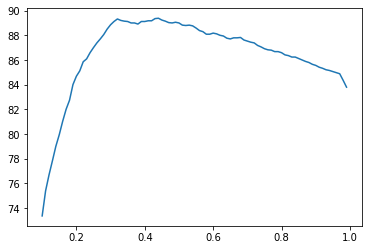

In [51]:
plt.plot(thresholds, acc)

# Part 3: Answer

## Dealing dataset

In [52]:
dataset_ans = pd.read_csv('test.csv')

In [53]:
dataset_ans = dataset_ans.drop(columns=['id', 'CustomerId', 'Surname'])

In [54]:
dataset_ans = pd.get_dummies(data=dataset_ans, drop_first=True)

In [55]:
dataset_ans

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,597,35,8,131101.04,1,1,1,192852.67,1,0,0
1,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2,706,42,8,95386.82,1,1,1,75732.25,0,1,0
3,788,32,4,112079.58,1,0,0,89368.59,0,0,1
4,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2995,530,41,4,0.00,2,0,1,147606.71,0,1,0
2996,639,77,6,80926.02,2,1,1,55829.25,0,0,1
2997,685,40,2,168001.34,2,1,1,167400.29,0,0,1
2998,692,69,10,154953.94,1,1,1,70849.47,0,0,1


In [56]:
x_ans = dataset_ans.values

In [57]:
x_ans.shape

(3000, 11)

## Feature Scaling

In [58]:
x_ans = sc.transform(x_ans)

## Answer

In [59]:
y_ans = model.predict(x_ans)
y_ans = y_ans.flatten()

94/94 [==============================] - 0s 2ms/step


In [60]:
y_ans

array([0.54320496, 0.20716621, 0.03955438, ..., 0.13599853, 0.02437568,
       0.55143803], dtype=float32)

In [61]:
def standardized_y(y_hat, threshold = 0.9):
    for i in range(len(y_hat)):
        if y_hat[i] >= threshold:
            y_hat[i] = 1
        else:
            y_hat[i] = 0
    return y_hat

In [62]:
y_ans = standardized_y(y_ans, threshold_optimal)

In [63]:
for i in range(len(y_ans)):
    print(f"{y_ans[i]:.0f}")

1
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
